<a href="https://colab.research.google.com/github/rajat1911996sharma/Machine-Learning-Model-Life-Cycle/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN
'''

#The Algorithm
```
Step 1: Choose the number K of neighbors

Step 2: Take the K nearest neighbors of the new data point, according to Euclidian Distance

Step 3: among these K neighbors, count the number of data points in each category 

Step 4: Assign the new data point to the category where you counted the most neighbors

Model ready
```
usually, we take 5 as the number of neighbors.

##Euclidean Distance
####Distance between two points P1 and P2

```
ED = ((x2-x1)^2 + (y2-y1)^2)^0.5
```

'''

#Data Preprocessing

##Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Importing Dataset

In [27]:
df = pd.read_csv('Social_Network_Ads.csv')

In [28]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [29]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

##Splitting the Dataset into Training and Test set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

#Training the KNN model on the Training Set

Minkowski Distance
```
MD = ((x2-x1)^p + (y2-y1)^p)^(1/p)
```
p=1
For Manhatten Distance
p=2
For Euclidian Distance
p --> +infinity
for Chebyshev Distance

[Minkowksi Distance Github](https://www.npmjs.com/package/compute-minkowski-distance)


In [31]:
from sklearn.neighbors import KNeighborsClassifier
nn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
#by default we use Minkowski metric form
nn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#Predicting a new result

In [32]:
nn.predict([[30,87000]])

array([0])

#Predicting the test set results

In [33]:
test_pred = nn.predict(X_test)

#Evaluating the model

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, test_pred))
print('\n')
print(confusion_matrix(y_test, test_pred))
print('\n')
print(accuracy_score(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        68
           1       0.73      0.75      0.74        32

    accuracy                           0.83       100
   macro avg       0.80      0.81      0.81       100
weighted avg       0.83      0.83      0.83       100



[[59  9]
 [ 8 24]]


0.83


#Elbow Method for geting the Optimal K value

##Algorithm for Elbow method

In [35]:
error_rate = []
for i in range(1,40):
 
 nn = KNeighborsClassifier(n_neighbors=i)
 nn.fit(X_train,y_train)
 pred_i = nn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

##Plotting the Elbow method results

Text(0, 0.5, 'Error Rate')

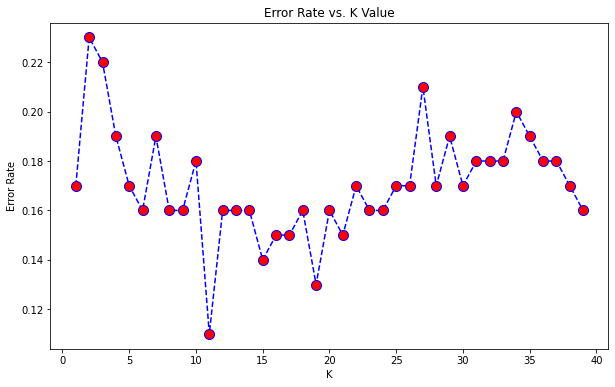

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

##Retraining the model with optimal k

###Training the KNN model on the Training Set

In [44]:
from sklearn.neighbors import KNeighborsClassifier
nn1 = KNeighborsClassifier(n_neighbors=11, metric='minkowski', p=2)
#by default we use Minkowski metric form
nn1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

###Predicting new result

In [45]:
nn1.predict([[30,87000]])

array([0])

###Predicting test set values

In [47]:
test_pred1 = nn1.predict(X_test)

###Evaluating the new predictions

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, test_pred1))
print('\n')
print(confusion_matrix(y_test, test_pred1))
print('\n')
print(accuracy_score(y_test, test_pred1))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



[[65  3]
 [ 8 24]]


0.89
